# DAT200 CA3 2023

Kaggle username: Tage Andersen

### Imports

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


### Reading data

In [15]:
train = pd.read_csv('train.csv', sep=',')

### Data exploration and visualisation

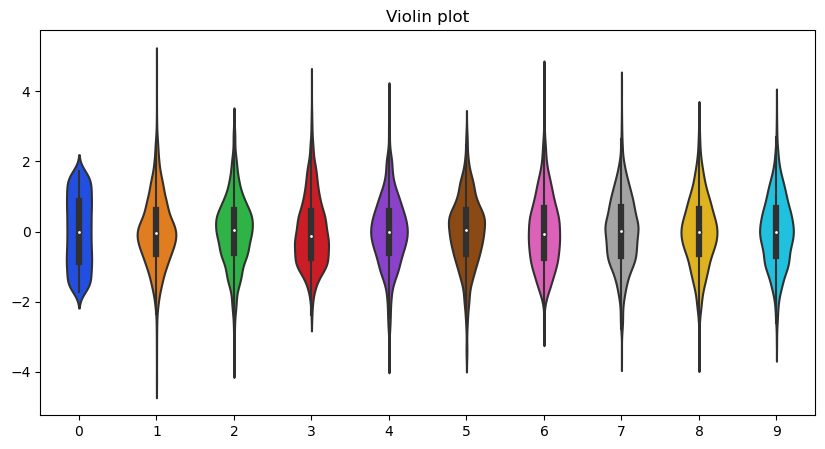

In [16]:
# Separating features and target variable
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Repairing the scaled 'class' column:

# y_train = y_train.apply(lambda x: 1 if x > 0 else 0)

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler object on the training data
X_train_sc = scaler.fit(X_train)

# Transform the training and test data using the scaler object
X_train_normalized = pd.DataFrame(scaler.transform(X_train))

#%% Visualizing the scaled data before cleaning:

plt.figure(figsize=(10, 5))
sns.violinplot(data=X_train_normalized,
            rotation=45,
            dodge=True,   # separate plots of different colors
            width=0.5,    # width of plots
            palette = "bright"
       )

plt.title("Violin plot")

plt.show()

### Data cleaning

In [17]:
#%% Removing outliers using the interquartile range (IQR) method

# Calculate the IQR for each column in the dataset:
Q1 = X_train_normalized.quantile(0.25)
Q3 = X_train_normalized.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outlier:
threshold = 1.5

train = X_train_normalized.copy()
for col in train.columns:
    lower_bound = Q1[col] - threshold * IQR[col]
    upper_bound = Q3[col] + threshold * IQR[col]
    train[col] = train[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

train = train.dropna(axis=0)  # remove rows with NaN values

### Data exploration after cleaning

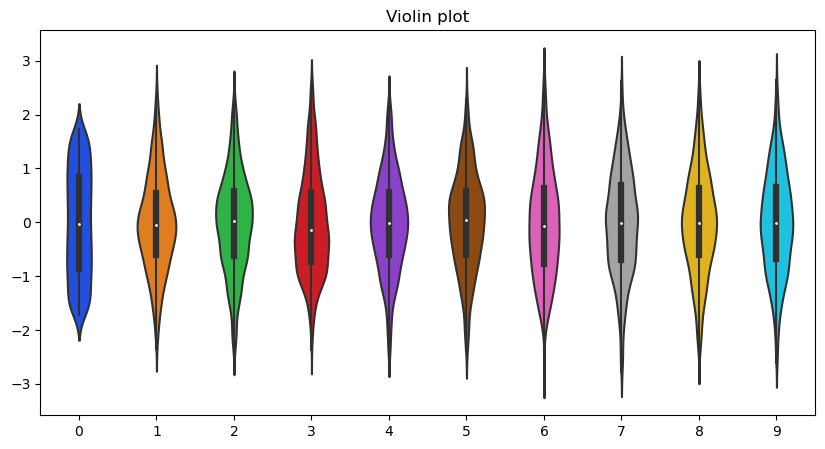

In [18]:
#%% Visualizing the scaled data after cleaning:

plt.figure(figsize=(10, 5))
sns.violinplot(data=train,
            rotation=45,
            dodge=True,   # separate plots of different colors
            width=0.5,    # width of plots
            palette = "bright"
       )

plt.title("Violin plot")

plt.show()

#### Train test split

In [19]:
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

### Modelling

In [20]:
n_estimators = [10, 20, 30, 40, 50]
results = {}

for size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=1)
    # y_train = y_train.apply(lambda x: 1 if x > 0 else 0)
    scaler = StandardScaler()
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.transform(X_test)
    for n in n_estimators:
        rfc = RandomForestClassifier(n_estimators=n)
        rfc.fit(X_train_sc, y_train)
        y_pred = rfc.predict(X_test_sc)
        key = f"{size}-{n}"
        results[key] = (accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred))

print(results)

# Reading through the short result dictionary will give pointers to which combinations of test_sizes and n_estimators work best.


{'0.1-10': (0.8872549019607843, 0.8490566037735849, 0.9278350515463918, 0.8866995073891626), '0.1-20': (0.8921568627450981, 0.8440366972477065, 0.9484536082474226, 0.8932038834951457), '0.1-30': (0.8627450980392157, 0.8053097345132744, 0.9381443298969072, 0.8666666666666667), '0.1-40': (0.8676470588235294, 0.8017241379310345, 0.9587628865979382, 0.8732394366197184), '0.1-50': (0.8823529411764706, 0.8288288288288288, 0.9484536082474226, 0.8846153846153847), '0.2-10': (0.875, 0.8529411764705882, 0.8923076923076924, 0.8721804511278195), '0.2-20': (0.8970588235294118, 0.8695652173913043, 0.9230769230769231, 0.8955223880597014), '0.2-30': (0.8946078431372549, 0.861904761904762, 0.9282051282051282, 0.8938271604938272), '0.2-40': (0.9044117647058824, 0.875, 0.9333333333333333, 0.9032258064516129), '0.2-50': (0.8995098039215687, 0.8666666666666667, 0.9333333333333333, 0.8987654320987654), '0.3-10': (0.869281045751634, 0.8436482084690554, 0.8900343642611683, 0.8662207357859533), '0.3-20': (0.88

### Final Evaluation

In [21]:
train = pd.read_csv('train.csv', sep=',')
test = pd.read_csv('test.csv', sep=',')

# Separating features and target variable
X = train.iloc[:, :-1]
y = train.iloc[:, -1]

rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(X, y)

# Make predictions
y_pred = rfc.predict(test)
# create a DataFrame from the y_pred array
results = pd.DataFrame({'index': np.arange(len(y_pred)), 'Drinkable': y_pred})

# save the results DataFrame to a CSV file
results.to_csv('results.csv', index=False)

### Kaggle submission

In [27]:
kaggle = pd.read_csv('results.csv', sep=',')
kaggle.set_index("index", inplace=True) # Setting the "id" column as the index column
print(kaggle)

       Drinkable
index           
0              1
1              1
2              0
3              0
4              0
...          ...
355            0
356            0
357            0
358            1
359            1

[360 rows x 1 columns]
